In [13]:
import numpy as np

def f_fitRL_rw(params, data, start_values=None):
    """
    Run a simple Rescorla-Wagner RL model on trial data.

    Parameters
    ----------
    params : array-like
        [lr, itemp]
        lr    : learning rate
        itemp : inverse temperature for softmax
    data : array-like, shape (n_trials, 3)
        Columns: [trial, chosen_stimulus, reward]
        - chosen_stimulus is assumed to be 1, 2, or 3 (like in the MATLAB code).
    start_values : array-like, optional
        Initial values for each stimulus, length nStim.

    Returns
    -------
    ll : float
        Negative log-likelihood of the observed choices under the model.
    pChoice : ndarray, shape (n_trials, nStim)
        Softmax choice probabilities over stimuli at each trial.
    value : ndarray, shape (n_trials + 1, nStim)
        Value estimates for each stimulus (includes initial + all updated values).
    choiceValue : ndarray, shape (n_trials, nStim)
        Values of options ordered: [chosen, unchosen1, unchosen2].
    choiceProbs : ndarray, shape (n_trials, nStim)
        Choice probs ordered: [chosen, unchosen1, unchosen2].
    """
    data = np.asarray(data)
    lr = float(params[0])
    itemp = float(params[1])

    n_trials = data.shape[0]
    # Stimulus IDs assumed to be integers like 1, 2, 3...
    stim_ids = np.unique(data[:, 1]).astype(int)
    nStim = len(stim_ids)

    # Preallocate arrays
    # value needs an extra row for the last updated values (trial+1)
    value = np.zeros((n_trials + 1, nStim), dtype=float)
    pChoice = np.zeros((n_trials, nStim), dtype=float)
    choiceValue = np.zeros((n_trials, nStim), dtype=float)
    choiceProbs = np.zeros((n_trials, nStim), dtype=float)

    # If start values are passed, set the first row
    if start_values is not None:
        start_values = np.asarray(start_values, dtype=float)
        if start_values.shape[0] != nStim:
            raise ValueError("start_values must have length equal to number of stimuli.")
        value[0, :] = start_values

    # Initialize negative log-likelihood
    ll = 0.0

    # Assume exactly 3 stimuli as in MATLAB (stimOptions = [1,2,3])
    # but we’ll compute on indices (0,1,2) internally
    stimOptions_idx = np.arange(nStim)  # 0,1,...,(nStim-1)

    for t in range(n_trials):
        # Current values for softmax
        v_t = value[t, :]

        # Softmax (numerically stable)
        z = itemp * v_t
        z -= np.max(z)          # for numerical stability
        exp_z = np.exp(z)
        p = exp_z / np.sum(exp_z)

        pChoice[t, :] = p

        # Chosen stimulus ID (1-based in data), convert to 0-based index
        chosenStim_id = int(data[t, 1])
        chosen_idx = chosenStim_id - 1

        # Unchosen indices
        unchosen_idx = stimOptions_idx[stimOptions_idx != chosen_idx]
        unChosenStim1_idx = unchosen_idx[0]
        unChosenStim2_idx = unchosen_idx[1]

        # Save values ordered by [chosen, unchosen1, unchosen2]
        choiceValue[t, 0] = v_t[chosen_idx]
        choiceValue[t, 1] = v_t[unChosenStim1_idx]
        choiceValue[t, 2] = v_t[unChosenStim2_idx]

        # Save probs ordered by [chosen, unchosen1, unchosen2]
        choiceProbs[t, 0] = p[chosen_idx]
        choiceProbs[t, 1] = p[unChosenStim1_idx]
        choiceProbs[t, 2] = p[unChosenStim2_idx]

        # Accumulate negative log-likelihood
        ll -= np.log(p[chosen_idx] + 1e-15)  # small epsilon to avoid log(0)

        # Update values using delta rule
        reward = data[t, 2]
        value[t + 1, :] = value[t, :]  # carry over previous values
        value[t + 1, chosen_idx] = value[t, chosen_idx] + lr * (reward - value[t, chosen_idx])

    return ll, pChoice, value, choiceValue, choiceProbs


def fitRL_rw(params, data):
    ll, pChoice, value, choiceValue, choiceProbs = f_fitRL_rw(params, data)
    return ll

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize



# ------------------------------------------------------------------
# Load in the data
# ------------------------------------------------------------------
class3data_all = np.loadtxt("class3data_homework.txt")
# Datafile information:
# Columns:
# 0 - Subject (1-n)
# 1 - Schedule (ignore for now)
# 2 - Session Number (1-8)
# 3 - Trial Number (1-300)
# 4 - Choice (0-2: three buttons)
# 5 - Reward (0-1)
# 6 - ReactionTime (0-30000 ms)


In [14]:
np.unique(class3data_all[:,0])

array([1., 2., 3., 4.])

In [15]:
np.unique(class3data_all[:,2])

array([1., 2., 3., 4., 5., 6., 7., 8.])

Fitted LR = 0.0759, IT = 3.3497
LL  = 264.9469
AIC = 533.8938
BIC = 541.3014


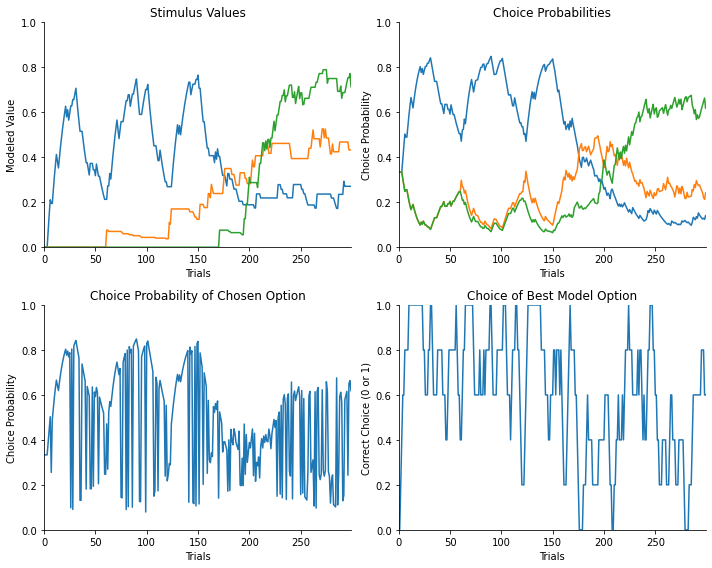

Fitted LR = 0.0527, IT = 4.3117
LL  = 234.4620
AIC = 472.9240
BIC = 480.3315


Fitted LR = 0.1953, IT = 3.3451
LL  = 237.0255
AIC = 478.0510
BIC = 485.4586


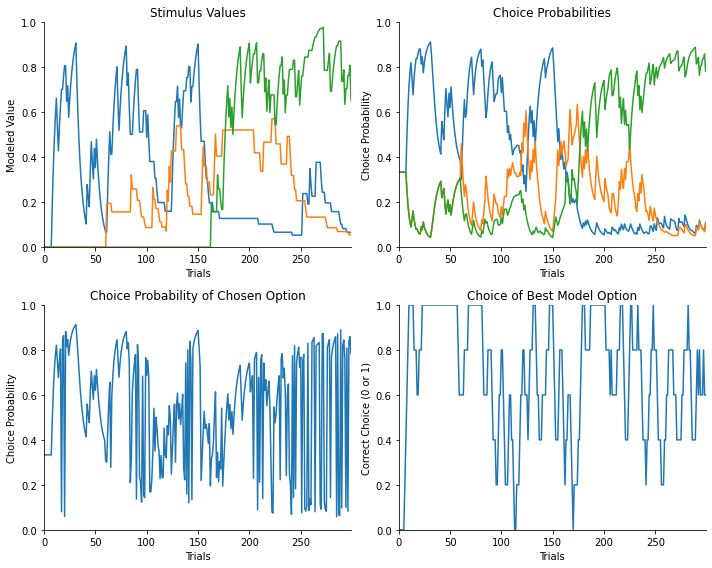

Fitted LR = 0.1187, IT = 4.7979
LL  = 209.2897
AIC = 422.5793
BIC = 429.9869


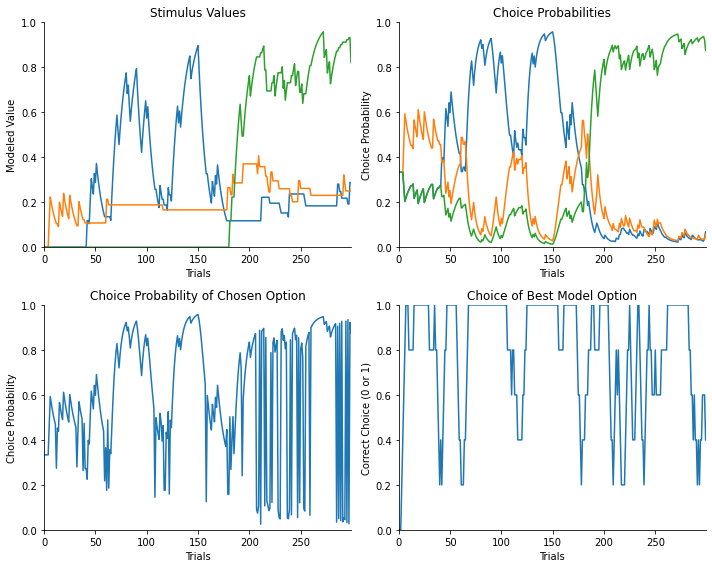

Fitted LR = 0.0882, IT = 8.3363
LL  = 127.4794
AIC = 258.9589
BIC = 266.3664


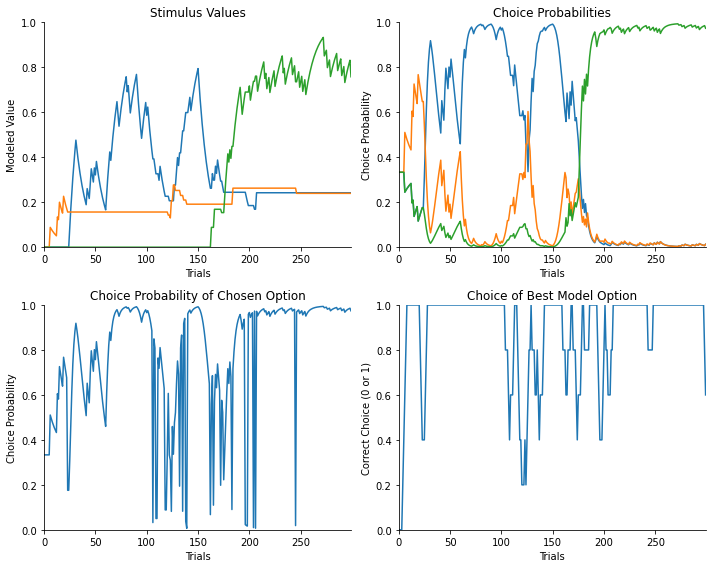

Fitted LR = 0.0573, IT = 5.1753
LL  = 229.3921
AIC = 462.7842
BIC = 470.1918


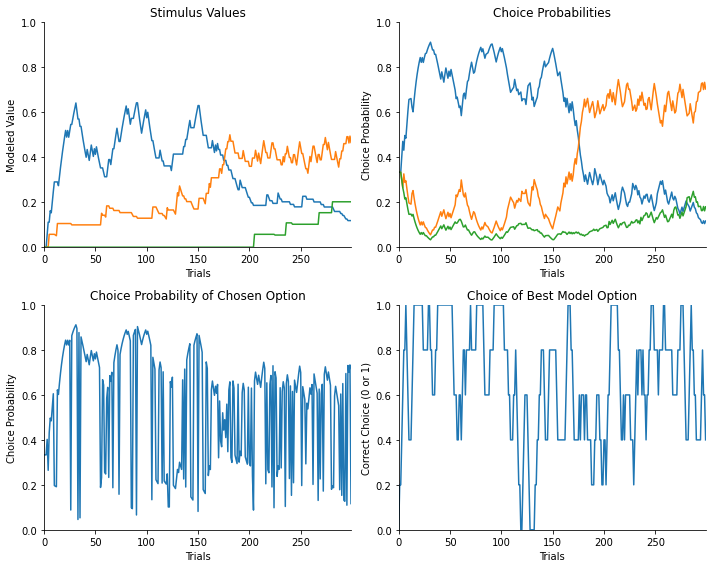

Fitted LR = 0.0543, IT = 5.6799
LL  = 234.4986
AIC = 472.9973
BIC = 480.4048


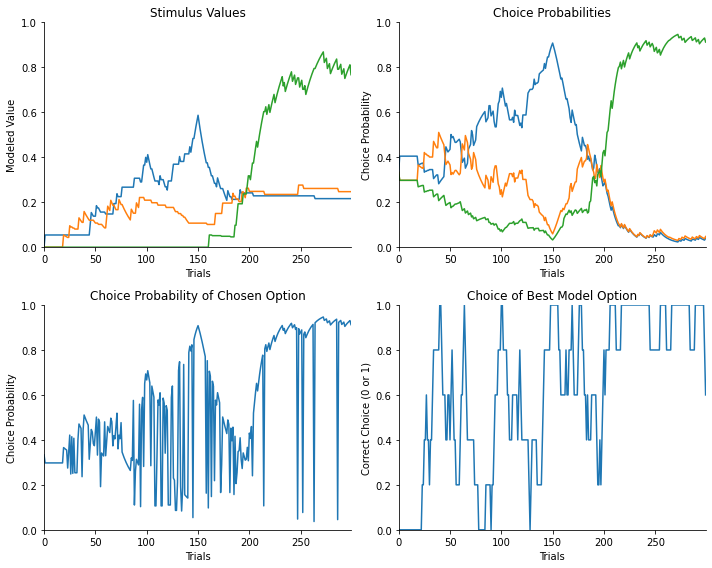

Fitted LR = 0.1288, IT = 6.8015
LL  = 143.7002
AIC = 291.4005
BIC = 298.8080


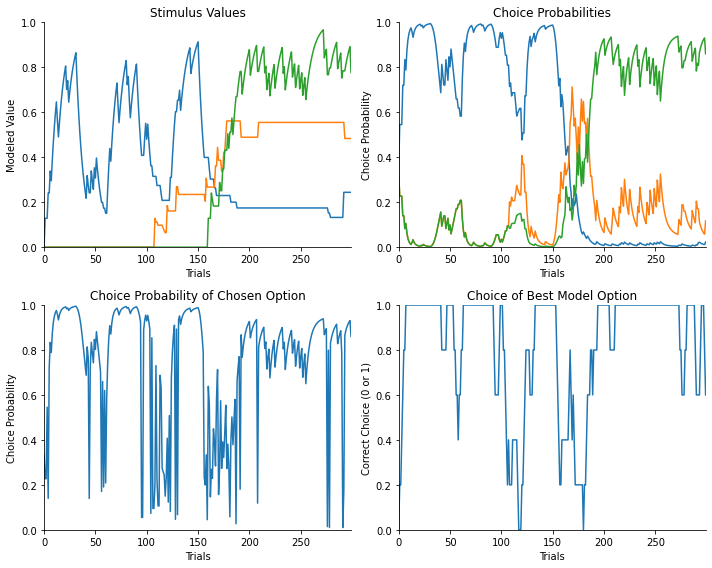

Fitted LR = 0.1040, IT = 8.4896
LL  = 151.8959
AIC = 307.7919
BIC = 315.1994


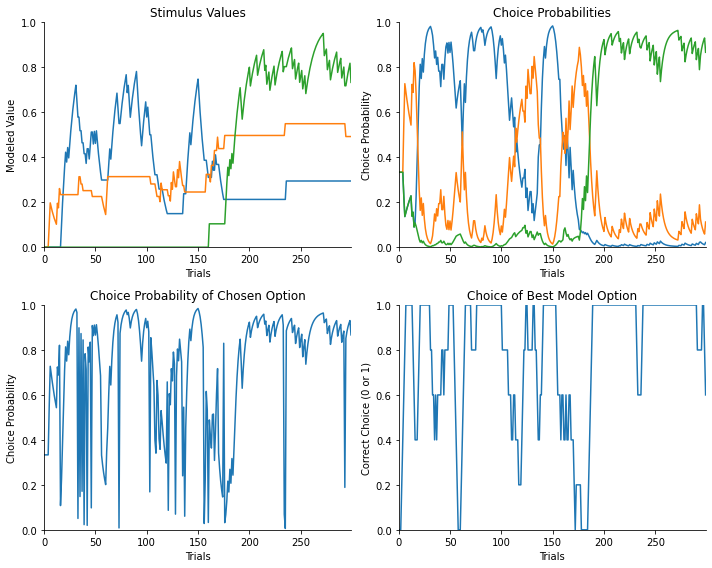

Fitted LR = 0.1415, IT = 8.5775
LL  = 124.5426
AIC = 253.0853
BIC = 260.4928


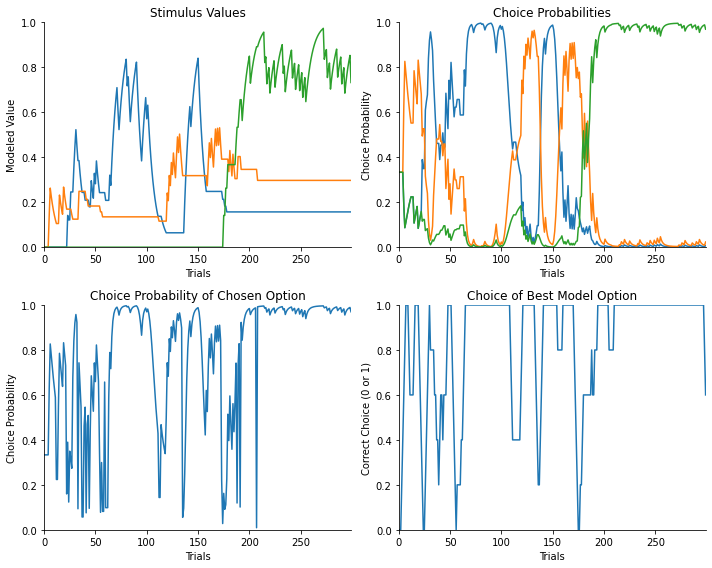

Fitted LR = 0.1302, IT = 7.4887
LL  = 160.5378
AIC = 325.0755
BIC = 332.4831


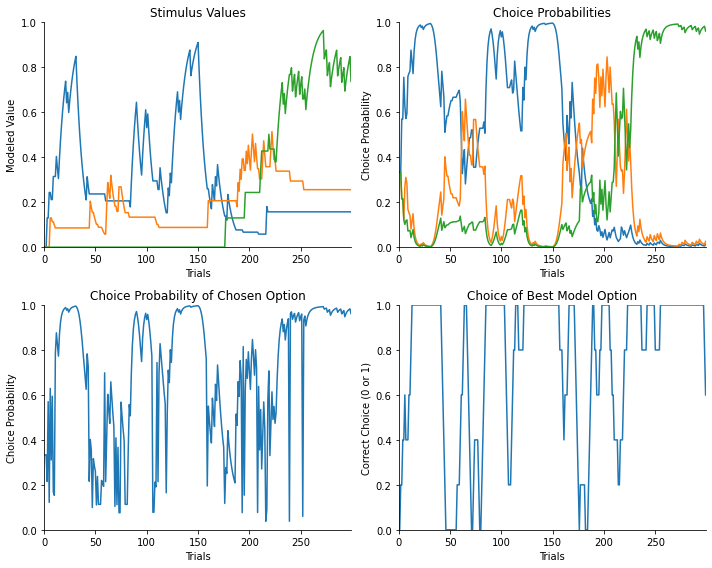

Fitted LR = 0.1181, IT = 8.1036
LL  = 133.4394
AIC = 270.8787
BIC = 278.2863


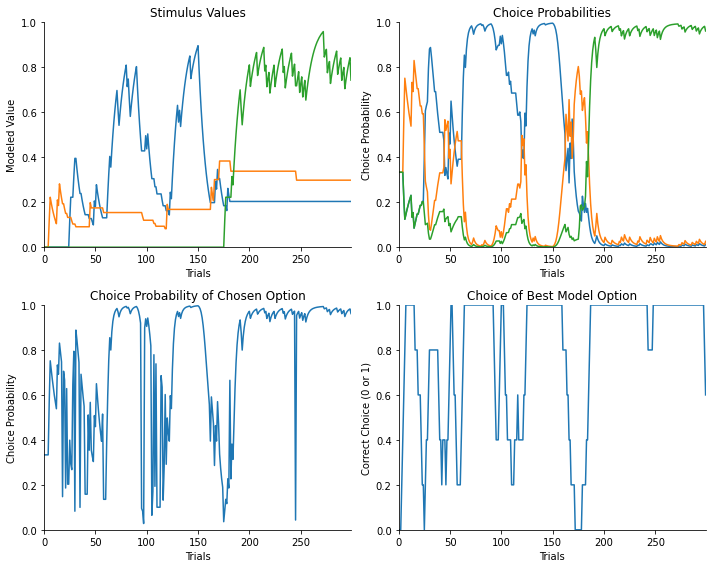

Fitted LR = 0.1623, IT = 6.0941
LL  = 169.6083
AIC = 343.2166
BIC = 350.6241


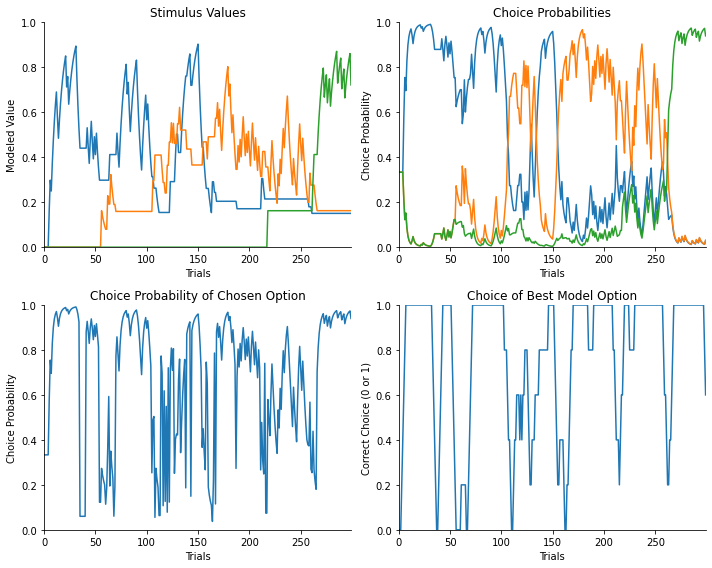

Fitted LR = 0.0756, IT = 5.1178
LL  = 251.7128
AIC = 507.4256
BIC = 514.8332


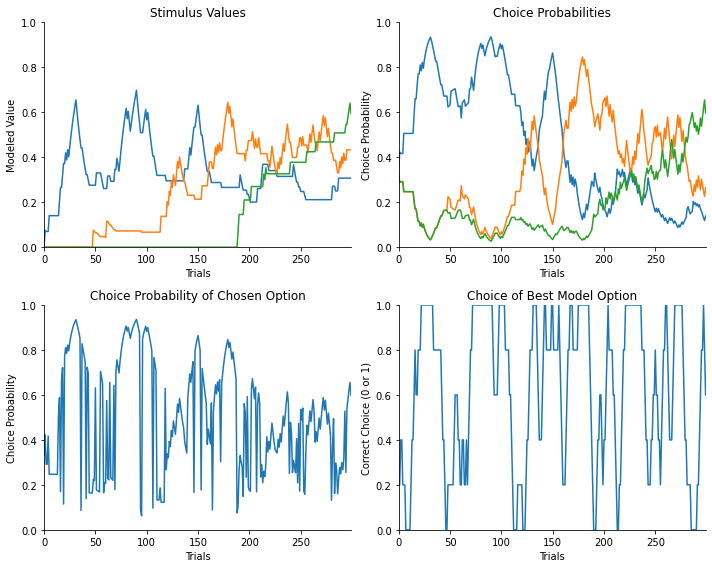

Fitted LR = 0.1362, IT = 6.7778
LL  = 106.4659
AIC = 216.9318
BIC = 224.3393


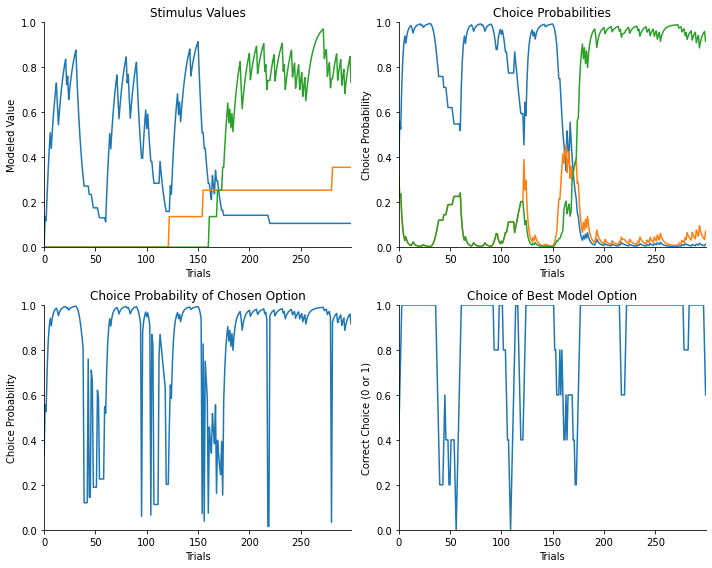

Fitted LR = 0.1821, IT = 13.6044
LL  = 60.5557
AIC = 125.1114
BIC = 132.5190


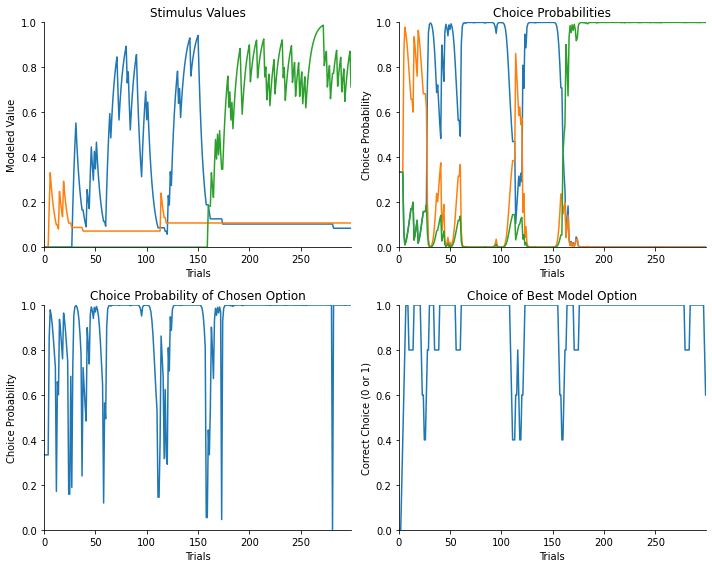

Fitted LR = 0.1279, IT = 4.3903
LL  = 219.0494
AIC = 442.0988
BIC = 449.5064


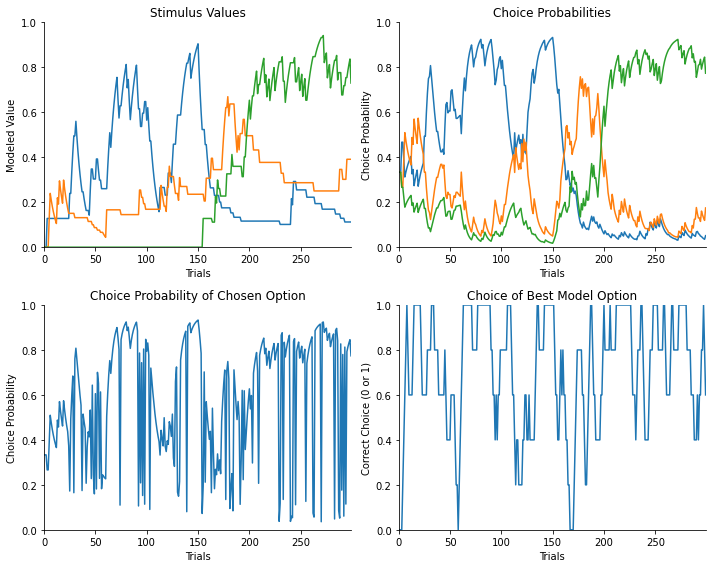

Fitted LR = 0.1674, IT = 5.5481
LL  = 151.2988
AIC = 306.5976
BIC = 314.0052


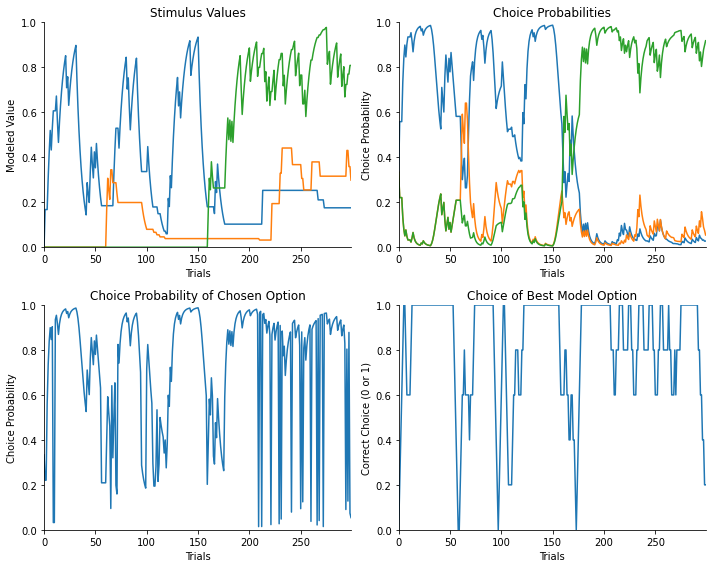

Fitted LR = 0.2095, IT = 5.6373
LL  = 160.8978
AIC = 325.7956
BIC = 333.2031


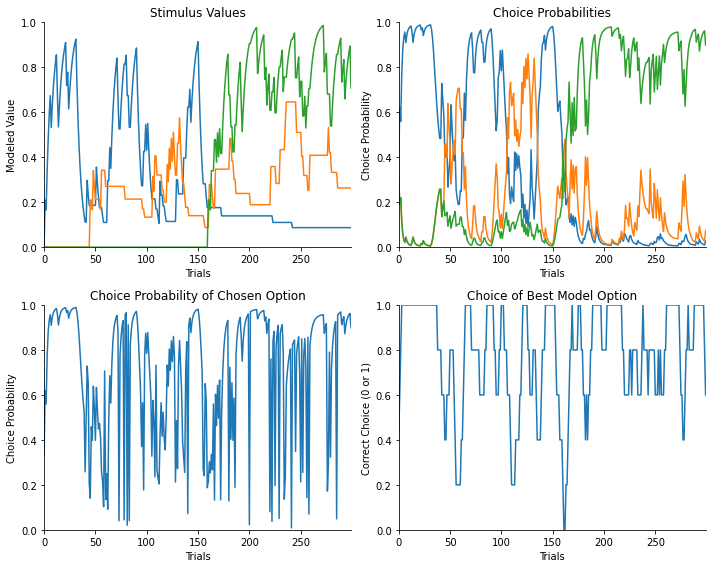

Fitted LR = 0.0679, IT = 9.1647
LL  = 99.7158
AIC = 203.4315
BIC = 210.8391


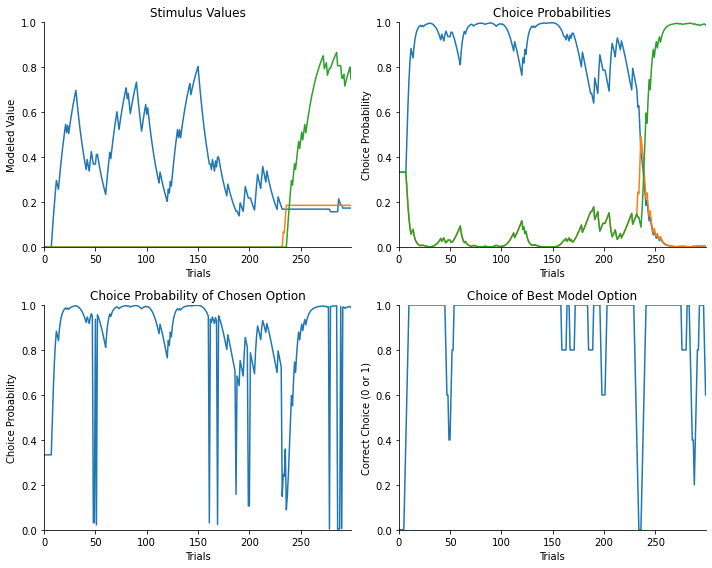

Fitted LR = 0.0557, IT = 4.8027
LL  = 231.5770
AIC = 467.1539
BIC = 474.5615


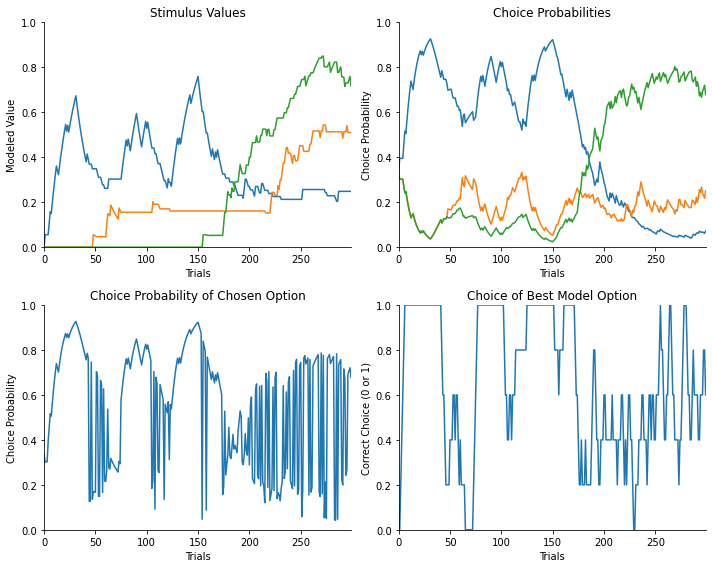

Fitted LR = 0.1833, IT = 5.7262
LL  = 182.8967
AIC = 369.7934
BIC = 377.2010


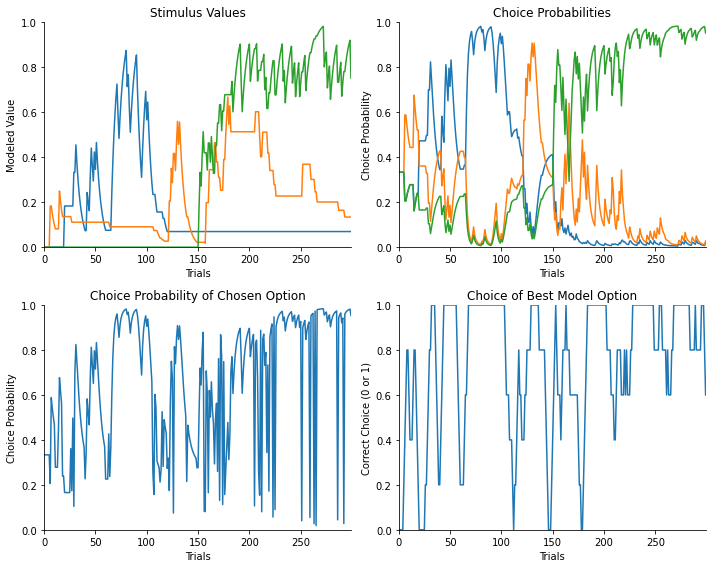

Fitted LR = 0.1413, IT = 9.4618
LL  = 85.9327
AIC = 175.8654
BIC = 183.2730


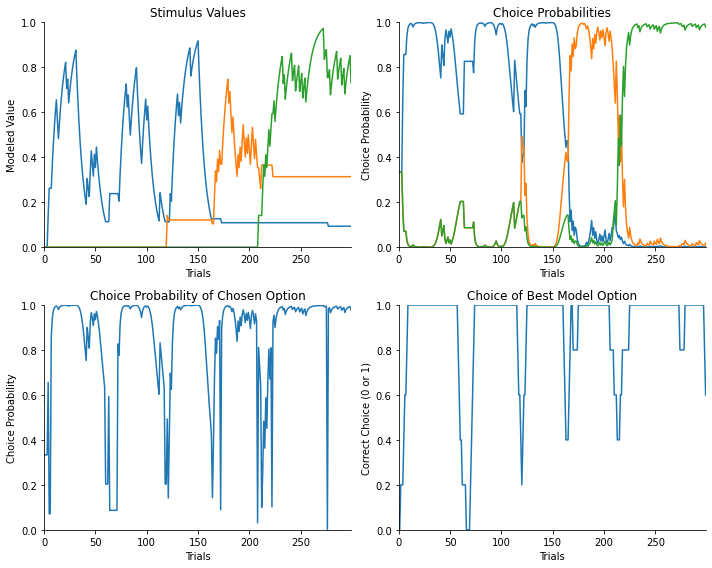

Fitted LR = 0.1401, IT = 5.6027
LL  = 172.5466
AIC = 349.0931
BIC = 356.5007


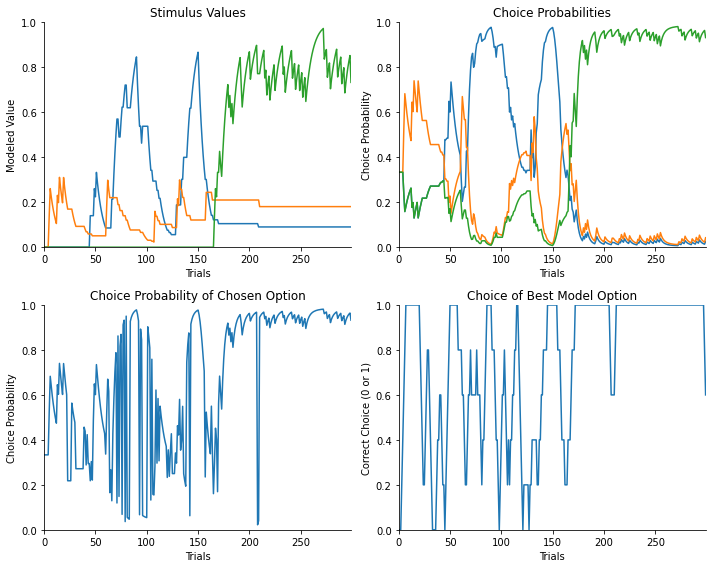

Fitted LR = 0.1217, IT = 6.5597
LL  = 145.2138
AIC = 294.4275
BIC = 301.8351


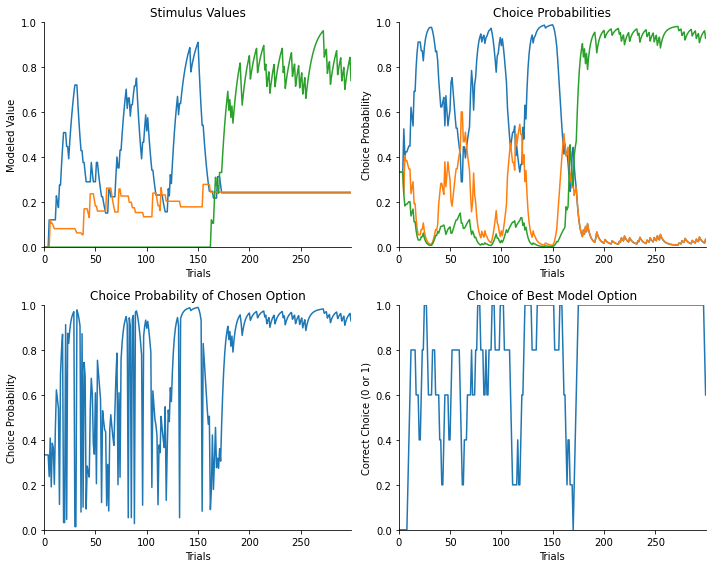

Fitted LR = 0.0593, IT = 7.0672
LL  = 155.9562
AIC = 315.9123
BIC = 323.3199


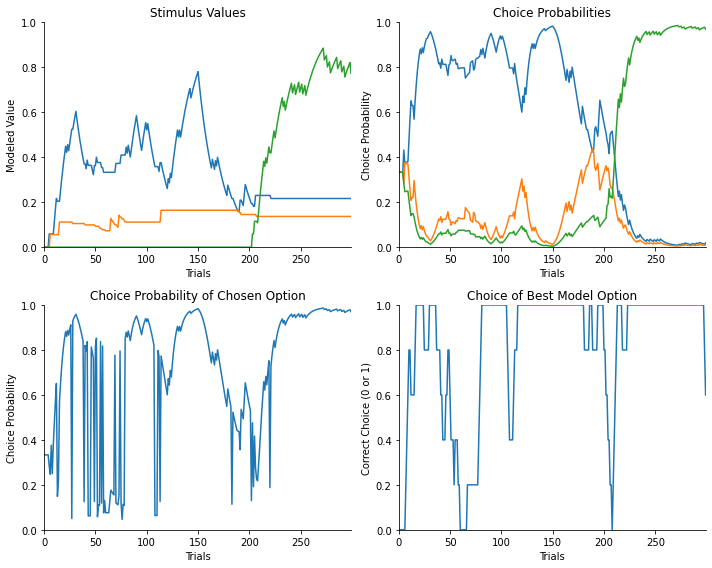

Fitted LR = 0.1149, IT = 9.5035
LL  = 116.2813
AIC = 236.5627
BIC = 243.9702


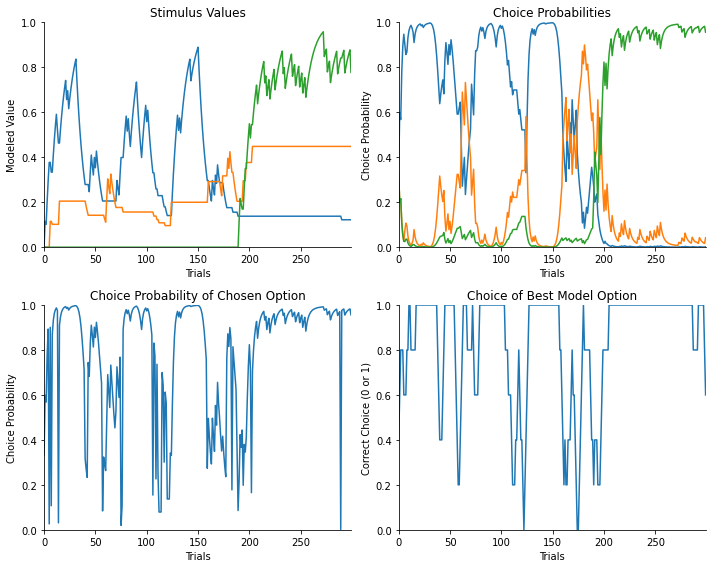

Fitted LR = 0.1827, IT = 8.3060
LL  = 91.9564
AIC = 187.9128
BIC = 195.3204


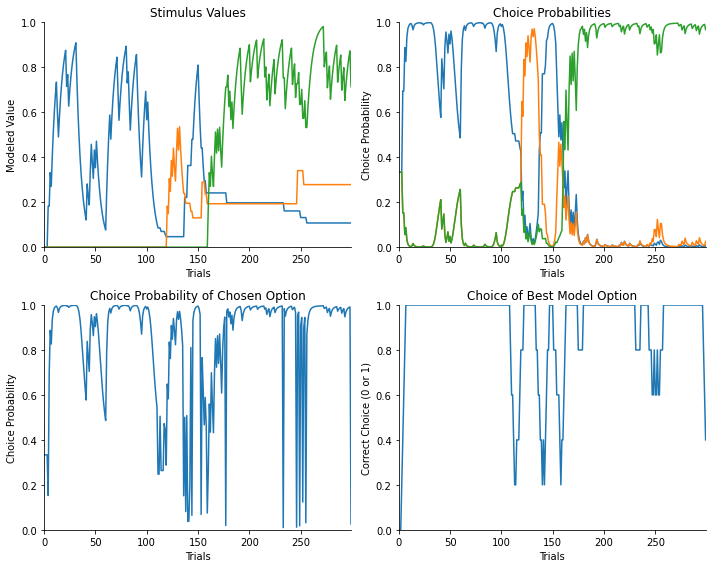

Fitted LR = 0.1159, IT = 6.6970
LL  = 95.3107
AIC = 194.6214
BIC = 202.0290


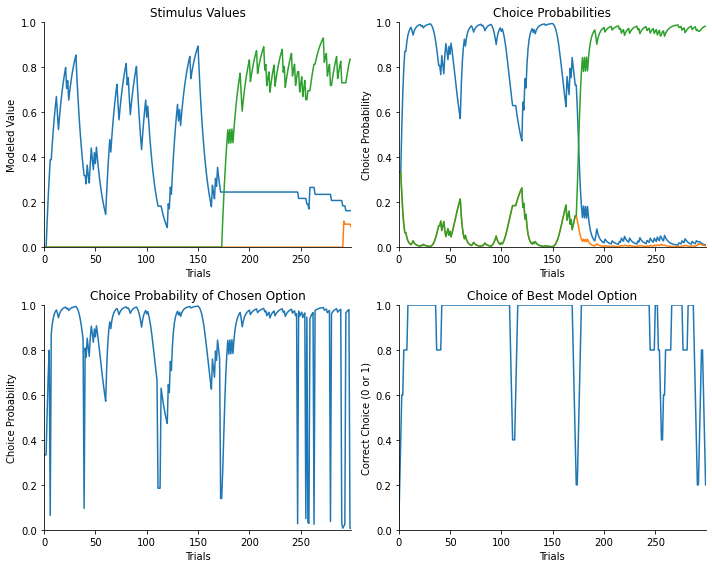

Fitted LR = 0.1295, IT = 2.5759
LL  = 274.3758
AIC = 552.7517
BIC = 560.1592


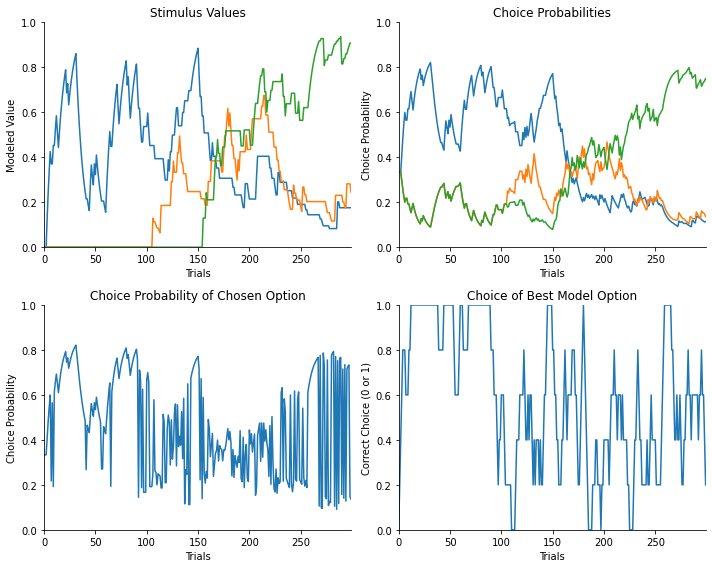

Fitted LR = 0.0443, IT = 3.9798
LL  = 244.2946
AIC = 492.5892
BIC = 499.9968


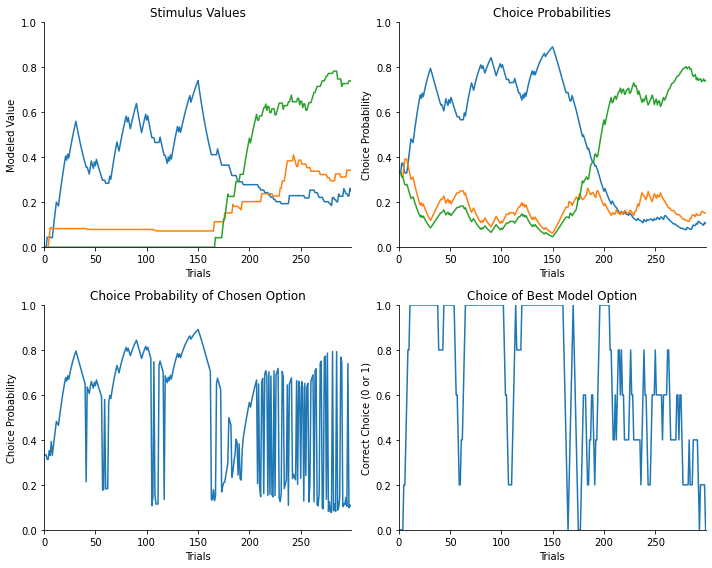

Fitted LR = 0.0969, IT = 3.8302
LL  = 228.1602
AIC = 460.3203
BIC = 467.7279


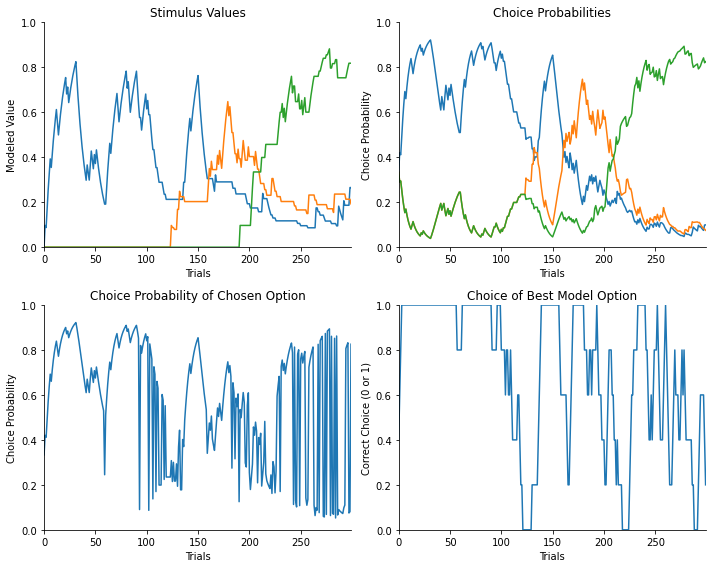

In [ ]:
LR_list = []
IT_list = []
subject_session_string_list = []

for subject_id in np.unique(class3data_all[:,0]).tolist():
    for session_id in np.unique(class3data_all[:,2]).tolist():
        class3data = class3data_all[(class3data_all[:, 0] == subject_id) & (class3data_all[:, 2] == session_id)]

        # The choice numbers in the data file are 0 - 2 (needs to be 1-3 to map to columns)
        class3data[:, 4] = class3data[:, 4] + 1

        # You want to run the analysis on trials, choices and rewards
        # For simplicity select these three columns (trial, choice, reward)
        schedule_data = class3data[:, 3:6]

        # ------------------------------------------------------------------
        # Optimization setup (analog to fminsearch in MATLAB)
        # ------------------------------------------------------------------
        # Initial parameter guess [LR, IT]
        params0 = np.array([0.5, 5.0])

        # Objective function for minimize
        def objective(params):
            # fitRL_rw should return the negative log-likelihood (ll)
            return fitRL_rw(params, schedule_data)

        # Max function evaluations / tolerances (similar to optimset)
        options = {
            "maxfev": 1000,
            "xatol": 1e-5,
            "fatol": 1e-5,
        }

        # Unconstrained optimization (like fminsearch)
        result = minimize(
            objective,
            params0,
            method="Nelder-Mead",
            options=options,
        )

        mparams = result.x
        # lla = result.fun  # if you want the final ll from the optimizer

        # Save the fitted parameter estimates for output
        LR = mparams[0]
        IT = mparams[1]
        LR_list.append(LR)
        IT_list.append(IT)
        subject_session_string_list.append(f"{subject_id}_{session_id}")
        # # ------------------------------------------------------------------
        # # Run the RL model using fitted parameters
        # # ------------------------------------------------------------------
        # ll, pChoice, pStimvalue, choiceValue, choiceProbs = f_fitRL_rw(mparams, schedule_data)

        # LL = ll  # log likelihood from best parameters

        # # ------------------------------------------------------------------
        # # Compute AIC and BIC
        # # ------------------------------------------------------------------
        # k = len(mparams)              # number of parameters
        # n = schedule_data.shape[0]    # number of trials

        # AIC = 2 * LL + 2 * k
        # BIC = np.log(n) * k + 2 * LL  # matches your MATLAB formula

        # print(f"Fitted LR = {LR:.4f}, IT = {IT:.4f}")
        # print(f"LL  = {LL:.4f}")
        # print(f"AIC = {AIC:.4f}")
        # print(f"BIC = {BIC:.4f}")

        # # ------------------------------------------------------------------
        # # Single session trial-by-trial plots
        # # ------------------------------------------------------------------
        # data_length = 300  # check your data length

        # fig, axes = plt.subplots(2, 2, figsize=(10, 8))

        # # 1) Stimulus values
        # ax = axes[0, 0]
        # # pStimvalue is (n_trials+1, nStim); we’ll plot first 300 trials
        # ax.plot(pStimvalue[:data_length, :])
        # ax.set_title("Stimulus Values")
        # ax.set_xlim(0, data_length - 1)
        # ax.set_ylim(0, 1)
        # ax.set_xlabel("Trials")
        # ax.set_ylabel("Modeled Value")
        # ax.spines["top"].set_visible(False)
        # ax.spines["right"].set_visible(False)

        # # 2) Choice probabilities of each option
        # ax = axes[0, 1]
        # ax.plot(pChoice[:data_length, :])
        # ax.set_title("Choice Probabilities")
        # ax.set_xlim(0, data_length - 1)
        # ax.set_ylim(0, 1)
        # ax.set_xlabel("Trials")
        # ax.set_ylabel("Choice Probability")
        # ax.spines["top"].set_visible(False)
        # ax.spines["right"].set_visible(False)

        # # 3) Choice probability of chosen option (column 0 in choiceProbs)
        # ax = axes[1, 0]
        # ax.plot(choiceProbs[:data_length, 0])
        # ax.set_title("Choice Probability of Chosen Option")
        # ax.set_xlim(0, data_length - 1)
        # ax.set_ylim(0, 1)
        # ax.set_xlabel("Trials")
        # ax.set_ylabel("Choice Probability")
        # ax.spines["top"].set_visible(False)
        # ax.spines["right"].set_visible(False)

        # # 4) Choice of best model option (smoothed correctness)
        # ax = axes[1, 1]
        # correctChoice = (
        #     choiceProbs[:, 0] - np.max(choiceProbs[:, 1:3], axis=1) > 0
        # ).astype(float)

        # # moving average smoothing window of size 5 (like smooth(...,'moving'))
        # window = 5
        # kernel = np.ones(window) / window
        # smoothed = np.convolve(correctChoice, kernel, mode="same")

        # ax.plot(smoothed[:data_length])
        # ax.set_title("Choice of Best Model Option")
        # ax.set_xlim(0, data_length - 1)
        # ax.set_ylim(0, 1)
        # ax.set_xlabel("Trials")
        # ax.set_ylabel("Correct Choice (0 or 1)")
        # ax.spines["top"].set_visible(False)
        # ax.spines["right"].set_visible(False)

        # plt.tight_layout()
        # plt.show()




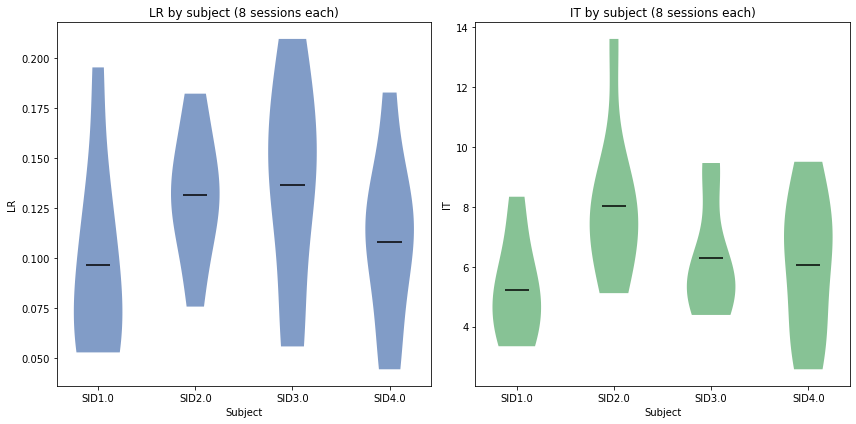

In [18]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Assume you already have:
# LR_list: list[float]
# IT_list: list[float]
# subject_session_string_list: list[str] like ["S1_1", "S1_2", ..., "S4_8"]

# 1. Extract subject IDs from "X_Y" strings (X is subject, Y is session)
subject_ids = [s.split("_")[0] for s in subject_session_string_list]

# 2. Group LR and IT values by subject
lr_by_subject = defaultdict(list)
it_by_subject = defaultdict(list)

for subj, lr, it in zip(subject_ids, LR_list, IT_list):
    lr_by_subject[subj].append(lr)
    it_by_subject[subj].append(it)

# Sort subjects to have consistent order on x-axis
subjects = sorted(lr_by_subject.keys())

# Build data lists in that order
lr_data = [lr_by_subject[subj] for subj in subjects]
it_data = [it_by_subject[subj] for subj in subjects]

# 3. Make the two violin plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# --- Left: LR violin plot ---
ax = axes[0]
parts = ax.violinplot(
    lr_data,
    showmeans=True,
    showmedians=False,
    showextrema=False
)

# Optional: color them a bit
for pc in parts['bodies']:
    pc.set_facecolor('#4C72B0')  # blue-ish
    pc.set_alpha(0.7)

if 'cmeans' in parts:
    parts['cmeans'].set_color('black')
    parts['cmeans'].set_linewidth(1.5)

ax.set_xticks(range(1, len(subjects) + 1))
ax.set_xticklabels(subjects)
ax.set_xlabel("Subject")
ax.set_ylabel("LR")
ax.set_title("LR by subject (8 sessions each)")

# --- Right: IT violin plot ---
ax = axes[1]
parts = ax.violinplot(
    it_data,
    showmeans=True,
    showmedians=False,
    showextrema=False
)

for pc in parts['bodies']:
    pc.set_facecolor('#55A868')  # green-ish
    pc.set_alpha(0.7)

if 'cmeans' in parts:
    parts['cmeans'].set_color('black')
    parts['cmeans'].set_linewidth(1.5)

ax.set_xticks(range(1, len(subjects) + 1))
ax.set_xticklabels(subjects)
ax.set_xlabel("Subject")
ax.set_ylabel("IT")
ax.set_title("IT by subject (8 sessions each)")

plt.tight_layout()
plt.savefig("Kempner_NDS_class3_homework.pdf")
plt.show()
